In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca10.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca100.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1000.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1001.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1002.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1003.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1004.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets\lung_aca\lungaca1005.jpeg
C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_se

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
image_set =  'C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets'

In [4]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [9]:
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [10]:
model = Model(inputs = resnet.input, outputs = prediction )

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
history = model.fit_generator(train_set, validation_data = validate_set, epochs = 5, verbose = 1)

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_15936\733434730.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, validation_data = validate_set, epochs = 5, verbose = 1)


Epoch 1/5
94/94 [==============================] - 1327s 14s/step - loss: 10.5713 - accuracy: 0.7501 - val_loss: 0.2002 - val_accuracy: 0.9530
Epoch 2/5
94/94 [==============================] - 1600s 17s/step - loss: 0.5832 - accuracy: 0.9129 - val_loss: 0.1016 - val_accuracy: 0.9657
Epoch 3/5
94/94 [==============================] - 1391s 15s/step - loss: 0.0782 - accuracy: 0.9725 - val_loss: 0.0702 - val_accuracy: 0.9737
Epoch 4/5
94/94 [==============================] - 1345s 14s/step - loss: 0.0624 - accuracy: 0.9793 - val_loss: 0.0788 - val_accuracy: 0.9730
Epoch 5/5
94/94 [==============================] - 1403s 15s/step - loss: 0.0188 - accuracy: 0.9931 - val_loss: 0.0477 - val_accuracy: 0.9847


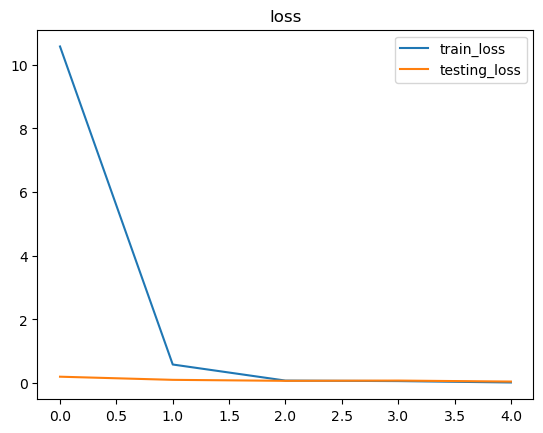

In [14]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

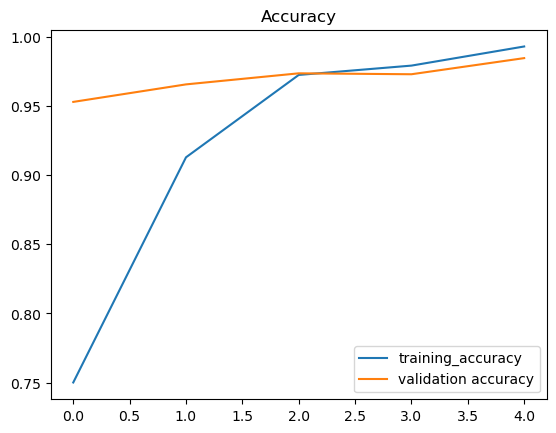

In [15]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
Y_pred = model.predict_generator(validate_set)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(validate_set.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['aca','n', 'scc']
print(classification_report(validate_set.classes, y_pred, target_names=target_names))

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_15936\2513002423.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validate_set)


Confusion Matrix
[[962   1  37]
 [  2 998   0]
 [  6   0 994]]
Classification Report
              precision    recall  f1-score   support

         aca       0.99      0.96      0.98      1000
           n       1.00      1.00      1.00      1000
         scc       0.96      0.99      0.98      1000

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [17]:
result = model.evaluate(validate_set,batch_size=128)
print("test_loss, test accuracy",result)

24/24 [==============================] - 315s 13s/step - loss: 0.0477 - accuracy: 0.9847
test_loss, test accuracy [0.04769914597272873, 0.984666645526886]


In [18]:
import re
report = classification_report(validate_set.classes, y_pred, target_names=target_names)
report = report.split("\n")
metric_pointer = 2
for i in range(len(report)):
    report[i] =report[i].strip()
    report[i]= re.sub(' +', ' ', report[i])
metrics = {}
for i in report[0].split(" "):
    metrics[i]= float(report[7].split(" ")[metric_pointer])
    metric_pointer += 1
print(metrics)

{'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 3000.0}


In [19]:
history.history["accuracy"][len(history.history["accuracy"])-1]

0.9930833578109741

In [ ]:
#RFC, CNN and Image Segementation model comparision

In [ ]:
#RFC

In [20]:
import keras

In [21]:
import joblib

In [22]:
loaded_model = joblib.load("C://Users//PC-LENOVO//Downloads//Completed_model_RFC.joblib")
X_test = pd.read_csv("C://Users//PC-LENOVO//Downloads//dataTestRFC.csv")
y_test = pd.read_csv("C://Users//PC-LENOVO//Downloads//dataTestRFC_y.csv")


C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [23]:
X_test

,Unnamed: 0,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,249,1,68,2,1,2,1,1,2,1,1,1,1,1,1,1
1,11,1,72,1,1,1,1,2,2,2,2,2,2,2,1,2
2,20,0,44,2,2,2,2,2,2,1,1,1,1,2,2,1
3,102,1,64,2,1,1,1,1,2,2,2,2,2,2,1,2
4,210,1,54,2,1,1,1,1,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,120,1,77,2,2,2,2,1,2,1,2,1,2,2,2,1
58,53,1,49,2,1,1,2,2,2,2,2,2,2,2,2,2
59,22,0,21,2,1,1,1,2,2,2,1,1,1,2,1,1
60,229,1,57,1,1,1,1,2,1,2,1,2,2,2,2,2


In [24]:
X_test = X_test.drop(['Unnamed: 0'], axis=1)

In [25]:
y_test

,Unnamed: 0,LUNG_CANCER
0,249,0
1,11,1
2,20,1
3,102,1
4,210,1
...,...,...
57,120,1
58,53,1
59,22,0
60,229,1


In [26]:
y_test= y_test.drop(['Unnamed: 0'], axis=1)

In [27]:
result = loaded_model.score(X_test, y_test)
print(loaded_model.predict(X_test))
print(result)

[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1]
0.9516129032258065


In [28]:
from sklearn import metrics as mt

In [29]:
y_pred = loaded_model.predict(X_test)

In [30]:
import re
report = classification_report(y_test, y_pred)
report = report.split("\n")
metric_pointer = 2
for i in range(len(report)):
    report[i] =report[i].strip()
    report[i]= re.sub(' +', ' ', report[i])
metrics_RFC = {}
for i in report[0].split(" "):
    metrics_RFC[i]= float(report[7].split(" ")[metric_pointer])
    metric_pointer += 1
print(metrics_RFC)

{'precision': 0.95, 'recall': 0.95, 'f1-score': 0.95, 'support': 62.0}


In [ ]:
#CNN

In [31]:
loaded_model_CNN = joblib.load("C://Users//PC-LENOVO//Completed_model_CNN.joblib")

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-30 15:20:10         4286
metadata.json                                  2023-03-30 15:20:10           64
variables.h5                                   2023-03-30 15:20:12    266988240
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0


In [32]:
lung_dir = "C:/Users/PC-LENOVO/Downloads/LUNG_DATASET/lung_colon_image_set/lung_image_sets"
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         rotation_range = 20 ,
                                                         horizontal_flip = True ,
                                                         validation_split = 0.2
                                                         )
valid_gen =  keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split = 0.2)
train_data = train_gen.flow_from_directory(lung_dir, subset='training', target_size=(224,224), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=True)

val_data = valid_gen.flow_from_directory(lung_dir, subset='validation', target_size=(224,224), batch_size=64, color_mode='rgb', 
                                            class_mode='categorical', shuffle=False)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [33]:
from sklearn.metrics import classification_report

Y_pred = loaded_model_CNN.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(val_data.classes, y_pred))


47/47 [==============================] - 95s 2s/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1000
           1       1.00      0.99      1.00      1000
           2       0.95      0.93      0.94      1000

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [34]:
import re
report = classification_report(val_data.classes, y_pred)
report = report.split("\n")
metric_pointer = 2
for i in range(len(report)):
    report[i] =report[i].strip()
    report[i]= re.sub(' +', ' ', report[i])
metrics_CNN = {}
for i in report[0].split(" "):
    metrics_CNN[i]= float(report[7].split(" ")[metric_pointer])
    metric_pointer += 1
print(metrics_CNN)

{'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96, 'support': 3000.0}


In [35]:
df=pd.DataFrame.from_dict([metrics_CNN,metrics_RFC,metrics])
df.index = ['CNN','RFC','Image_Segmentation']
print(df)
df = df.drop('support', axis=1)

                    precision  recall  f1-score  support
CNN                      0.96    0.96      0.96   3000.0
RFC                      0.95    0.95      0.95     62.0
Image_Segmentation       0.98    0.98      0.98   3000.0


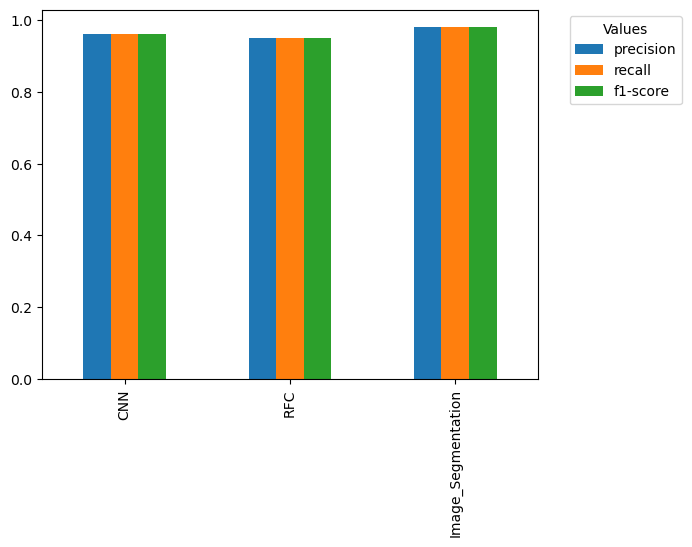

In [36]:
df.plot(kind='bar')
plt.legend(title='Values', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()